<a href="https://colab.research.google.com/github/daothuphuong98/machine_learning/blob/main/ML_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv')

In [ ]:
class LinearRegression:
  def train(self, X, y):
    self.X = np.c_[X, np.ones(X.shape[0])]
    inv_mat = np.linalg.inv(np.dot(self.X.T, self.X))
    self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
  def fit(self, X=None):
    if X is not None:
      return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
    return np.dot(self.X, self.coef)
  def mse(self, fitted, y):
    return np.power(fitted-y,2).sum()/y.shape[0]

In [ ]:
def plot(x,y,fitted):
  plt.plot(x,y, 'o')
  plt.plot(x, fitted)
  plt.show()

In [ ]:
x1 = LinearRegression()
x1.train(df['Diện tích'], df['Giá'])
fitted = x1.fit()

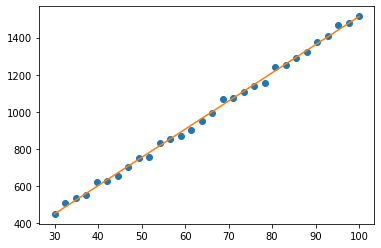

In [ ]:
plot(df['Diện tích'], df['Giá'], fitted)

In [ ]:
x1.fit(np.array([50, 100, 150]))

array([ 753.49027134, 1514.04481132, 2274.59935131])

Exercise 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
df = pd.read_csv('housing.csv', delimiter=r"\s+", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

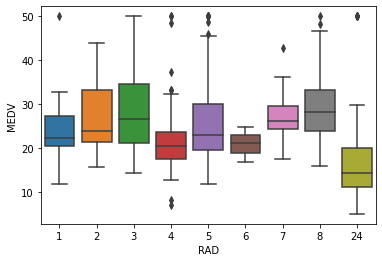

In [ ]:
sns.boxplot(x = df['RAD'], y = df['MEDV'])

In [ ]:
df['RAD24'] = (df['RAD'] == 24).astype('int')

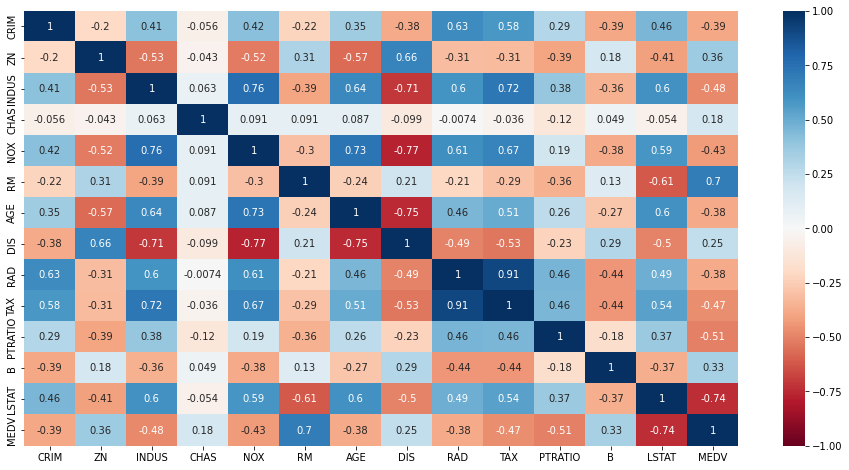

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), vmin=-1, vmax =1, annot=True, cmap='RdBu')

In [ ]:
full_col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
sel_col = ["CRIM" , "NOX", "RM", "DIS", "TAX", "PTRATIO", "B", "LSTAT", 'RAD24']

In [ ]:
x2 = LinearRegression()
x2.train(df[sel_col], np.log(df['MEDV']))
fitted = x2.fit()
x2.mse(fitted, np.log(df['MEDV']))

0.036573609574191444

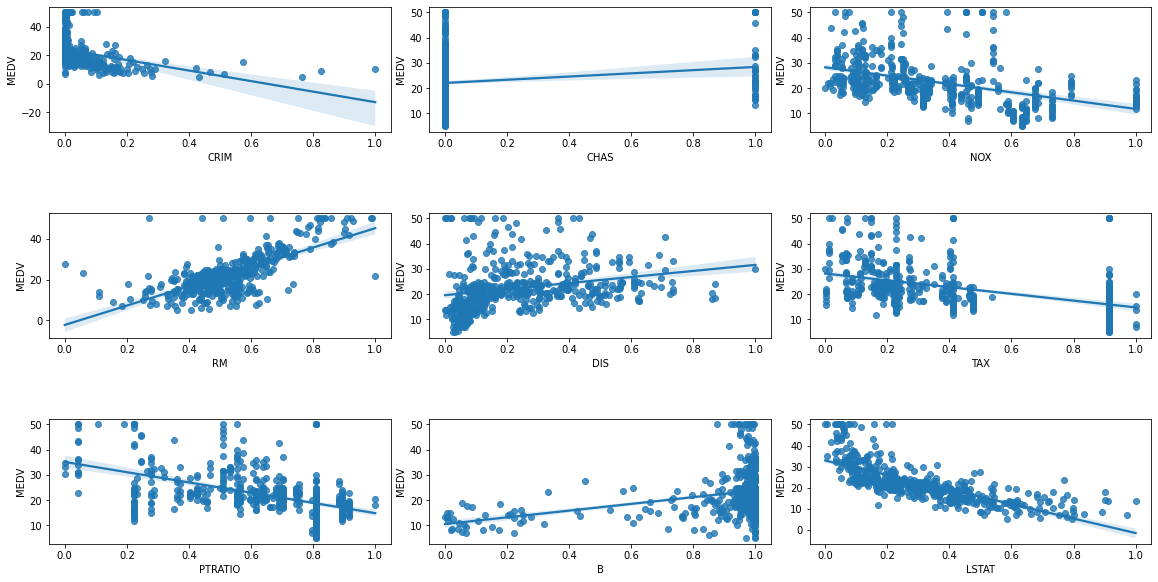

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ["CRIM" , "CHAS", "NOX", "RM", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]
x = df.loc[:,column_sels]
y = df['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)